In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read in csv file as a DataFrame
lp_df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [ ]:
# explore the first 20 rows
lp_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
lp_df.shape

(614, 13)

In [ ]:
#column information
lp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#summary statistics
lp_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#the Id column is not needed, let's drop it
lp_df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
# explore the first 5 rows
lp_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#missing values in decsending order
lp_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling the missing data
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{lp_df[col].value_counts()}\n","-"*50)
    lp_df[col] = lp_df[col].fillna(
    lp_df[col].dropna().mode().values[0] )


lp_df.isnull().sum().sort_values(ascending=False)

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 --------------------------------------------------
Married:
Yes    398
No   

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#list of all the numeric columns
num = lp_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = lp_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  lp_df[num]
#categoric df
loan_cat = lp_df[cat]

Y    422
N    192
Name: Loan_Status, dtype: int64


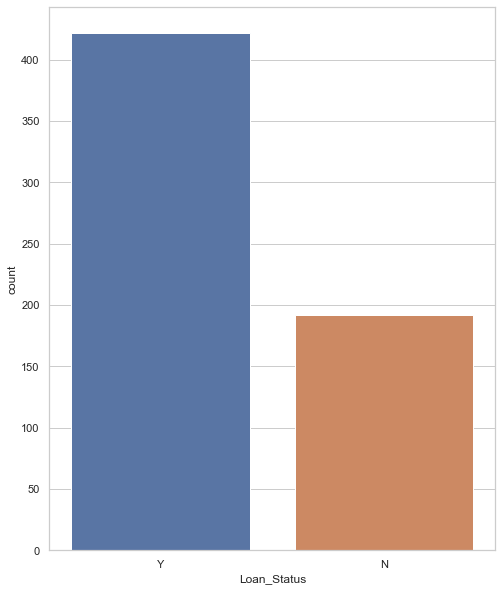

In [ ]:
print(lp_df[cat[-1]].value_counts())

total = float(len(lp_df[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
sns.countplot(lp_df[cat[-1]])
plt.show()

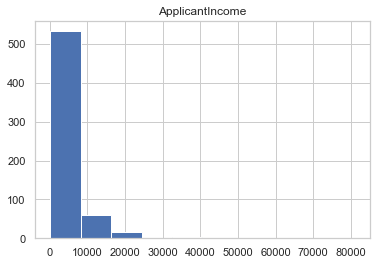

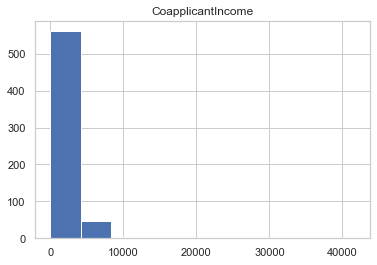

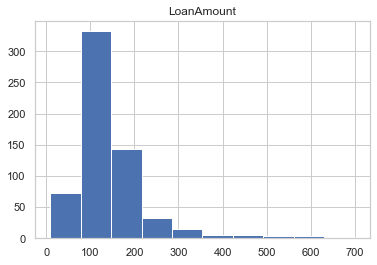

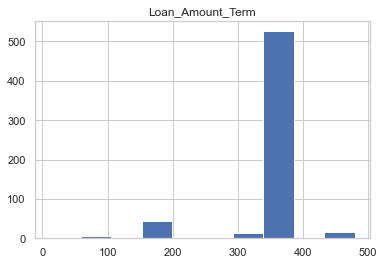

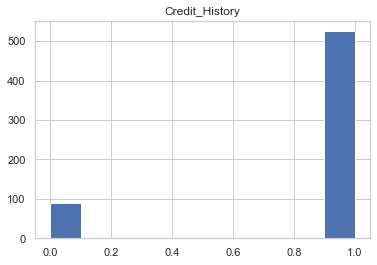

In [ ]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

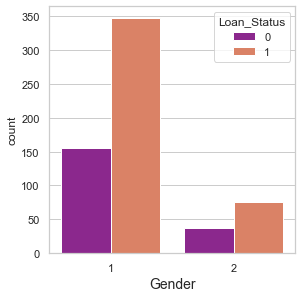

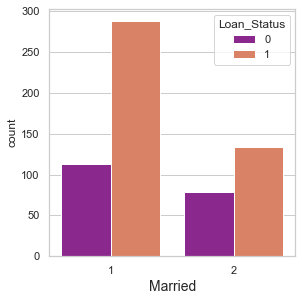

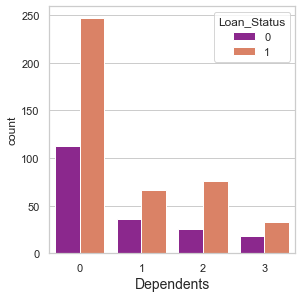

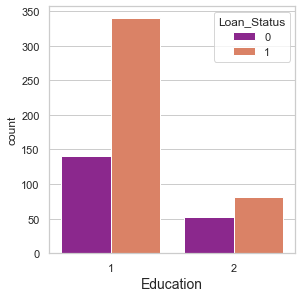

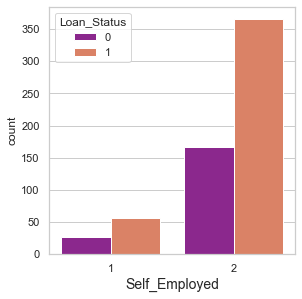

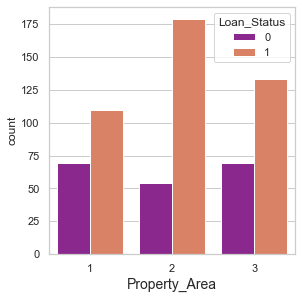

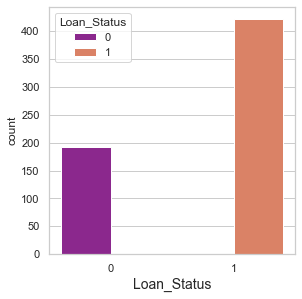

In [ ]:
for i in loan_cat:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=lp_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [ ]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3,'1':1,'2':2}

# adding the new numeric values from the to_numeric variable to dataset
lp_df = lp_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(lp_df.Dependents)

# dropping the previous Dependents column
lp_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with the dataset
lp_df = pd.concat([lp_df, Dependents_], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {lp_df.shape}\n")

training set (row, col): (614, 12)



<AxesSubplot:>

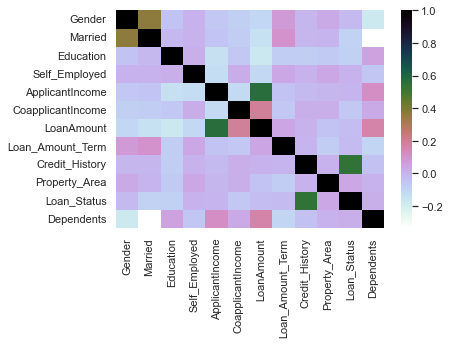

In [ ]:
sns.heatmap(lp_df.corr() ,cmap='cubehelix_r')

In [ ]:
X = lp_df.drop('Loan_Status' , axis = 1 )
y = lp_df['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

In [ ]:
adamodel = AdaBoostClassifier()
adamodel.fit(X_train , y_train)
pred_l = adamodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

81.08108108108108

In [ ]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

78.91891891891892

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
pred_x = XGB.predict(X_test)
acc_x = accuracy_score(y_test , pred_x)*100
acc_x

[13:06:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


77.83783783783784

In [ ]:
models = pd.DataFrame({
    'Model': ['Ada Boosting Classifier','Gradient Boosting Classifier', 'Extreme Gradient Boosting Classifier'],
    'Score': [acc_l,acc_gbc,acc_x ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Ada Boosting Classifier,81.081081
1,Gradient Boosting Classifier,78.918919
2,Extreme Gradient Boosting Classifier,77.837838
